## Line Graphs in Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.style.use('ggplot') # Other sytles to use; fivethirtyeight
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)}) # Set figure size 
sns.set(font_scale = 2)

###### Simple line graph

In [3]:
ex_rate_df=pd.read_csv('Exchange_Rates.csv')
ex_rate_df['TIME']=ex_rate_df['TIME'].astype(str)
simple_line_graph_ex_rate_df=ex_rate_df.query("LOCATION=='AUS'")
simple_line_graph_ex_rate_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EXCH,TOT,NATUSD,A,2000,1.724827,NaN
1,AUS,EXCH,TOT,NATUSD,A,2001,1.933443,NaN
2,AUS,EXCH,TOT,NATUSD,A,2002,1.840563,NaN
3,AUS,EXCH,TOT,NATUSD,A,2003,1.541914,NaN
4,AUS,EXCH,TOT,NATUSD,A,2004,1.359752,NaN


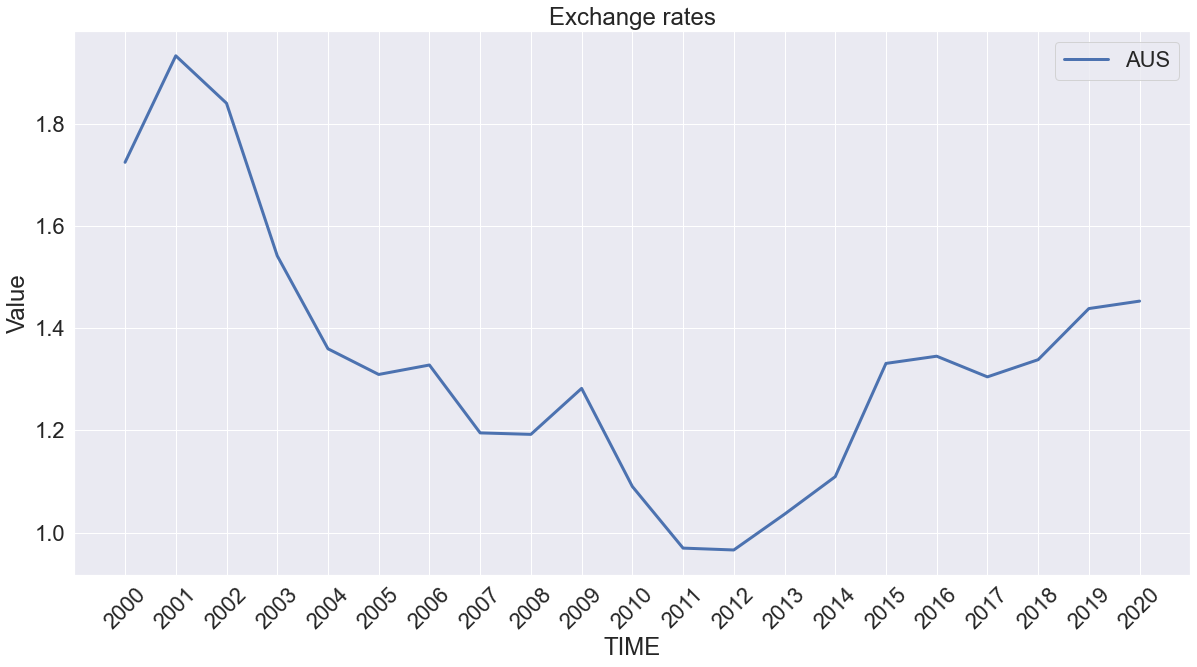

In [5]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.lineplot(data=simple_line_graph_ex_rate_df, x=simple_line_graph_ex_rate_df['TIME'],
             y=simple_line_graph_ex_rate_df['Value'],linewidth=3)
plt.title('Exchange rates',fontsize=24)
plt.legend(['AUS'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

###### Multiple line graphs

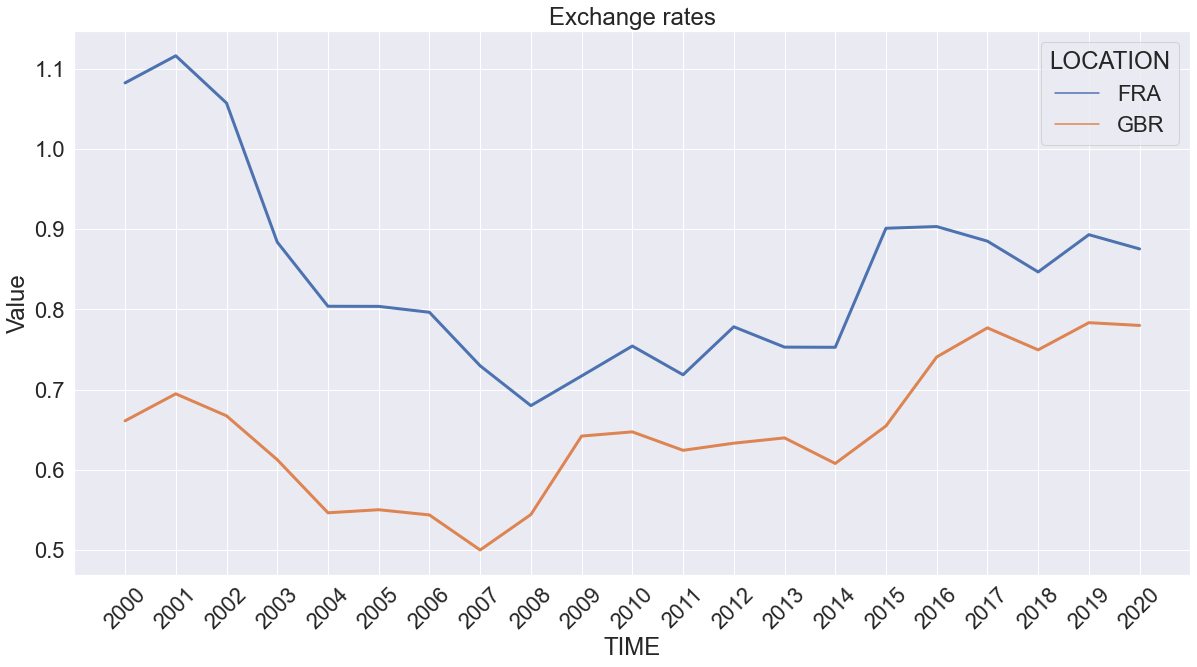

In [6]:
ex_rate_df=ex_rate_df[ex_rate_df['LOCATION'].isin(['FRA','GBR','USD'])]

plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.lineplot(data=ex_rate_df, x=ex_rate_df['TIME'], y=ex_rate_df['Value'],hue=ex_rate_df['LOCATION'],
              linewidth=3)
plt.title('Exchange rates',fontsize=24)
plt.xticks(rotation=45)
plt.show()

###### Simple Linear Regression Line

In [7]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


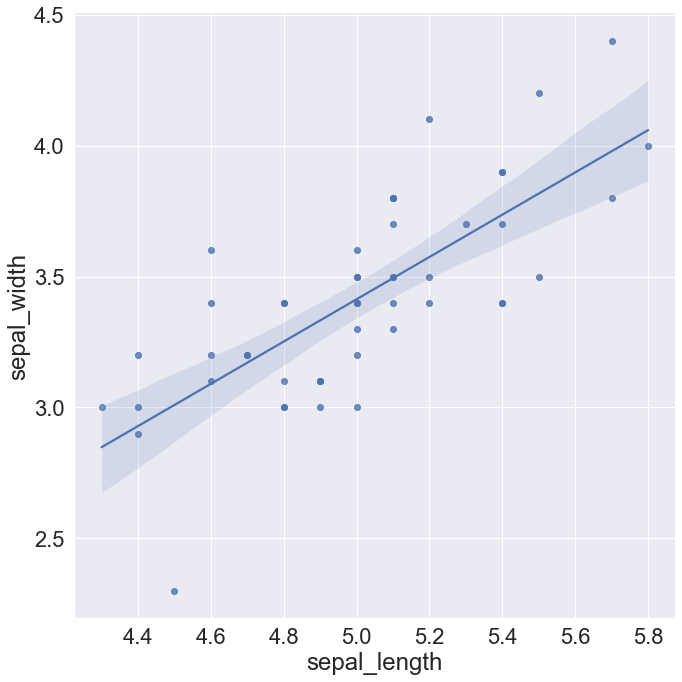

In [8]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)

sns.lmplot(data=iris_df[iris_df['class']=='Iris-setosa'], x="sepal_length", y="sepal_width",height=10)
plt.show()

###### Multiple Linear Regression

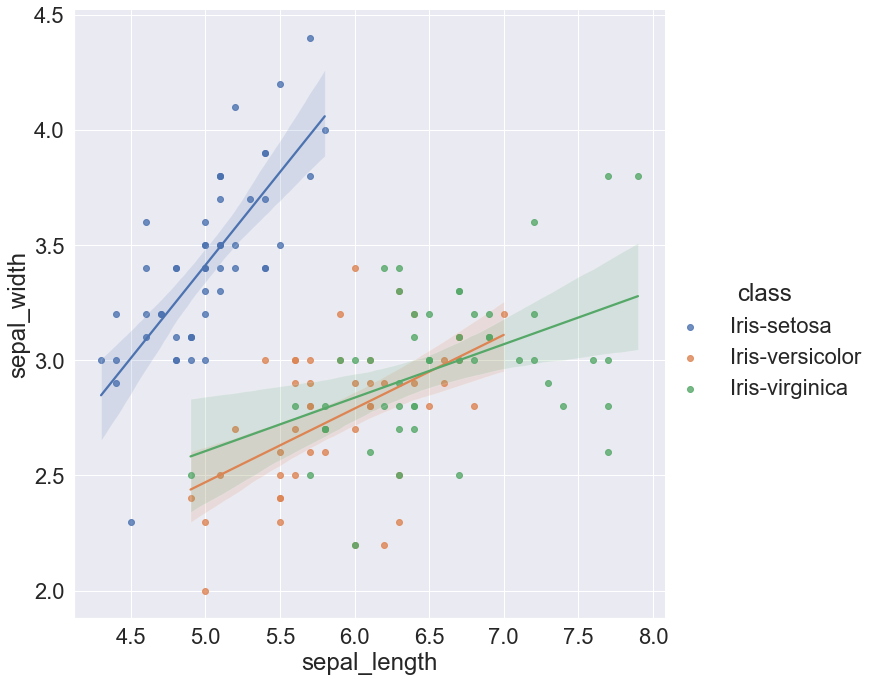

In [9]:
sns.lmplot(data=iris_df,x="sepal_length", y="sepal_width", hue="class",height=10)
plt.show()

## Bar Plot

In [10]:
score_df = pd.DataFrame(
    {
        "Students": ["Tom", "Peter","Simon", "Mary", "Jane","King","Hillary","Ethan","Page"],
        "Math": [79.00, 67.00,80.00, 84.00, 70.00,60.00,90.00,76.00,75],
        "Physics":[63.00, 98, 60.00, 90,84.00, 77.00,55.00,70,66.00],
        "Computer":[84.00,78.00, 57.00, 88.00, 75.00,93.00,92.00,98.00,90.00],
    },
    index=["Tom", "Peter","Simon", "Mary", "Jane","King","Hillary","Ethan","Page"]
)

score_df['Total']=score_df[['Math','Physics','Computer']].apply(np.sum,axis=1)
score_df

,Students,Math,Physics,Computer,Total
Tom,Tom,79.0,63.0,84.0,226.0
Peter,Peter,67.0,98.0,78.0,243.0
Simon,Simon,80.0,60.0,57.0,197.0
Mary,Mary,84.0,90.0,88.0,262.0
Jane,Jane,70.0,84.0,75.0,229.0
King,King,60.0,77.0,93.0,230.0
Hillary,Hillary,90.0,55.0,92.0,237.0
Ethan,Ethan,76.0,70.0,98.0,244.0
Page,Page,75.0,66.0,90.0,231.0


###### Simple bar chart

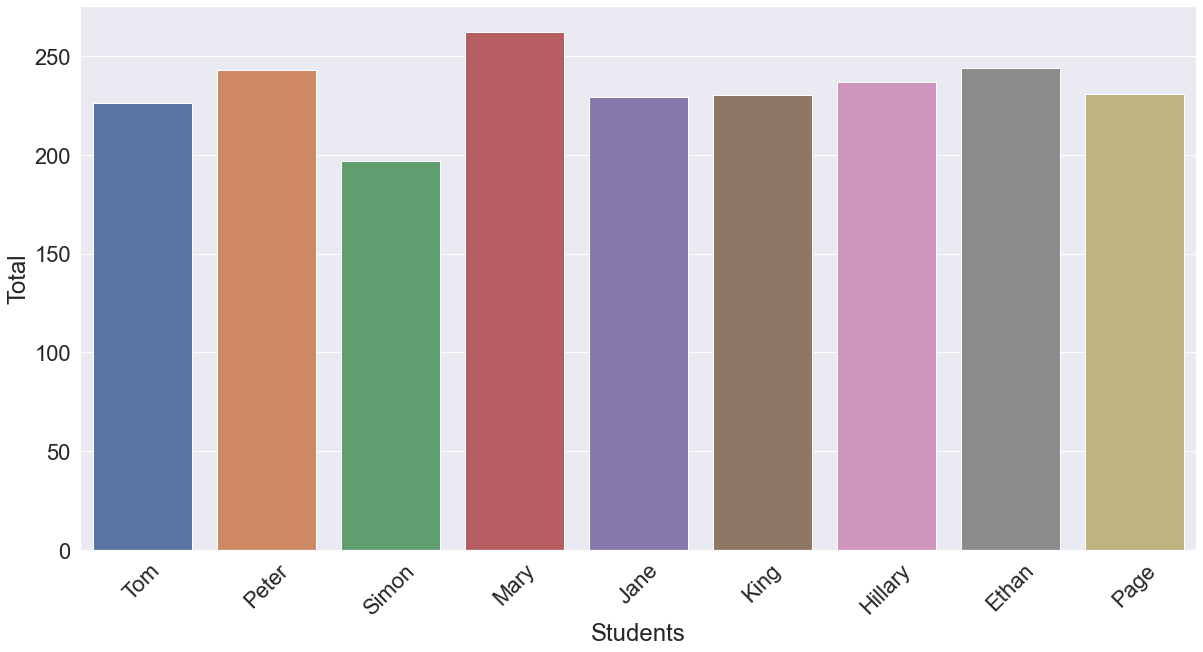

In [11]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.barplot(x=score_df['Students'], y=score_df['Total'])
plt.xticks(rotation=45)
plt.show()

###### Horizontal Bar chart
Simply interchange x and y axes

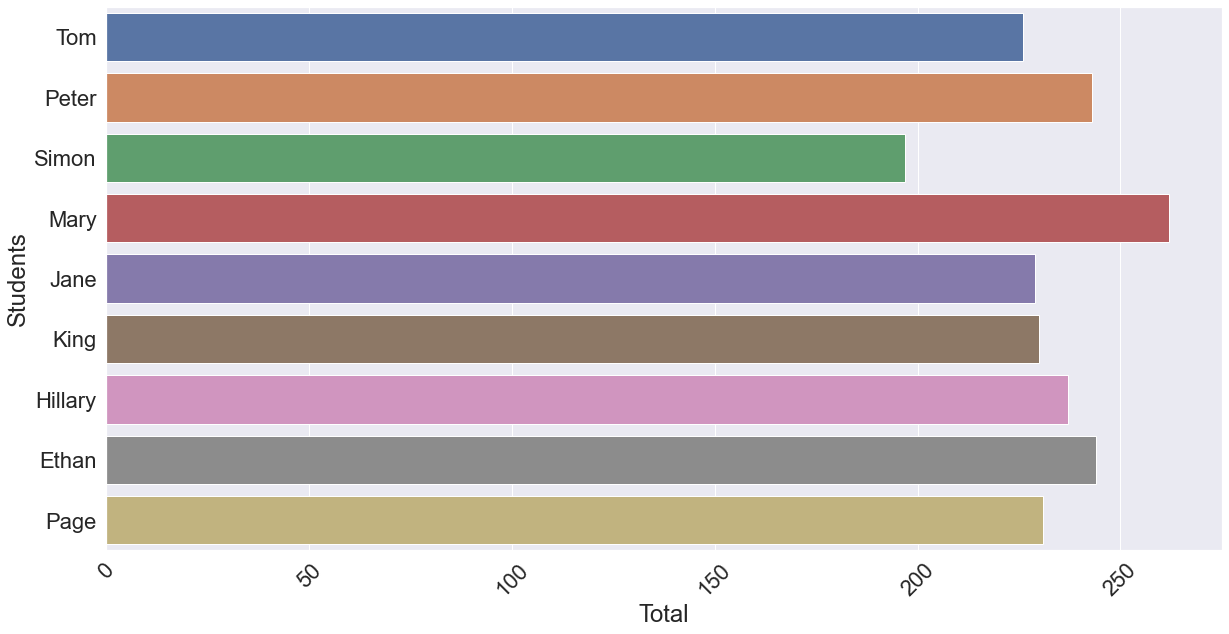

In [12]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.barplot(y=score_df['Students'], x=score_df['Total'])
plt.xticks(rotation=45)
plt.show()

###### Grouped Bar chart

In [13]:
score_melt_df=pd.melt(score_df.reset_index().head(),id_vars=['Students'],value_vars=['Math','Physics','Computer'],
        value_name='Score')
score_melt_df.head()

,Students,variable,Score
0,Tom,Math,79.0
1,Peter,Math,67.0
2,Simon,Math,80.0
3,Mary,Math,84.0
4,Jane,Math,70.0


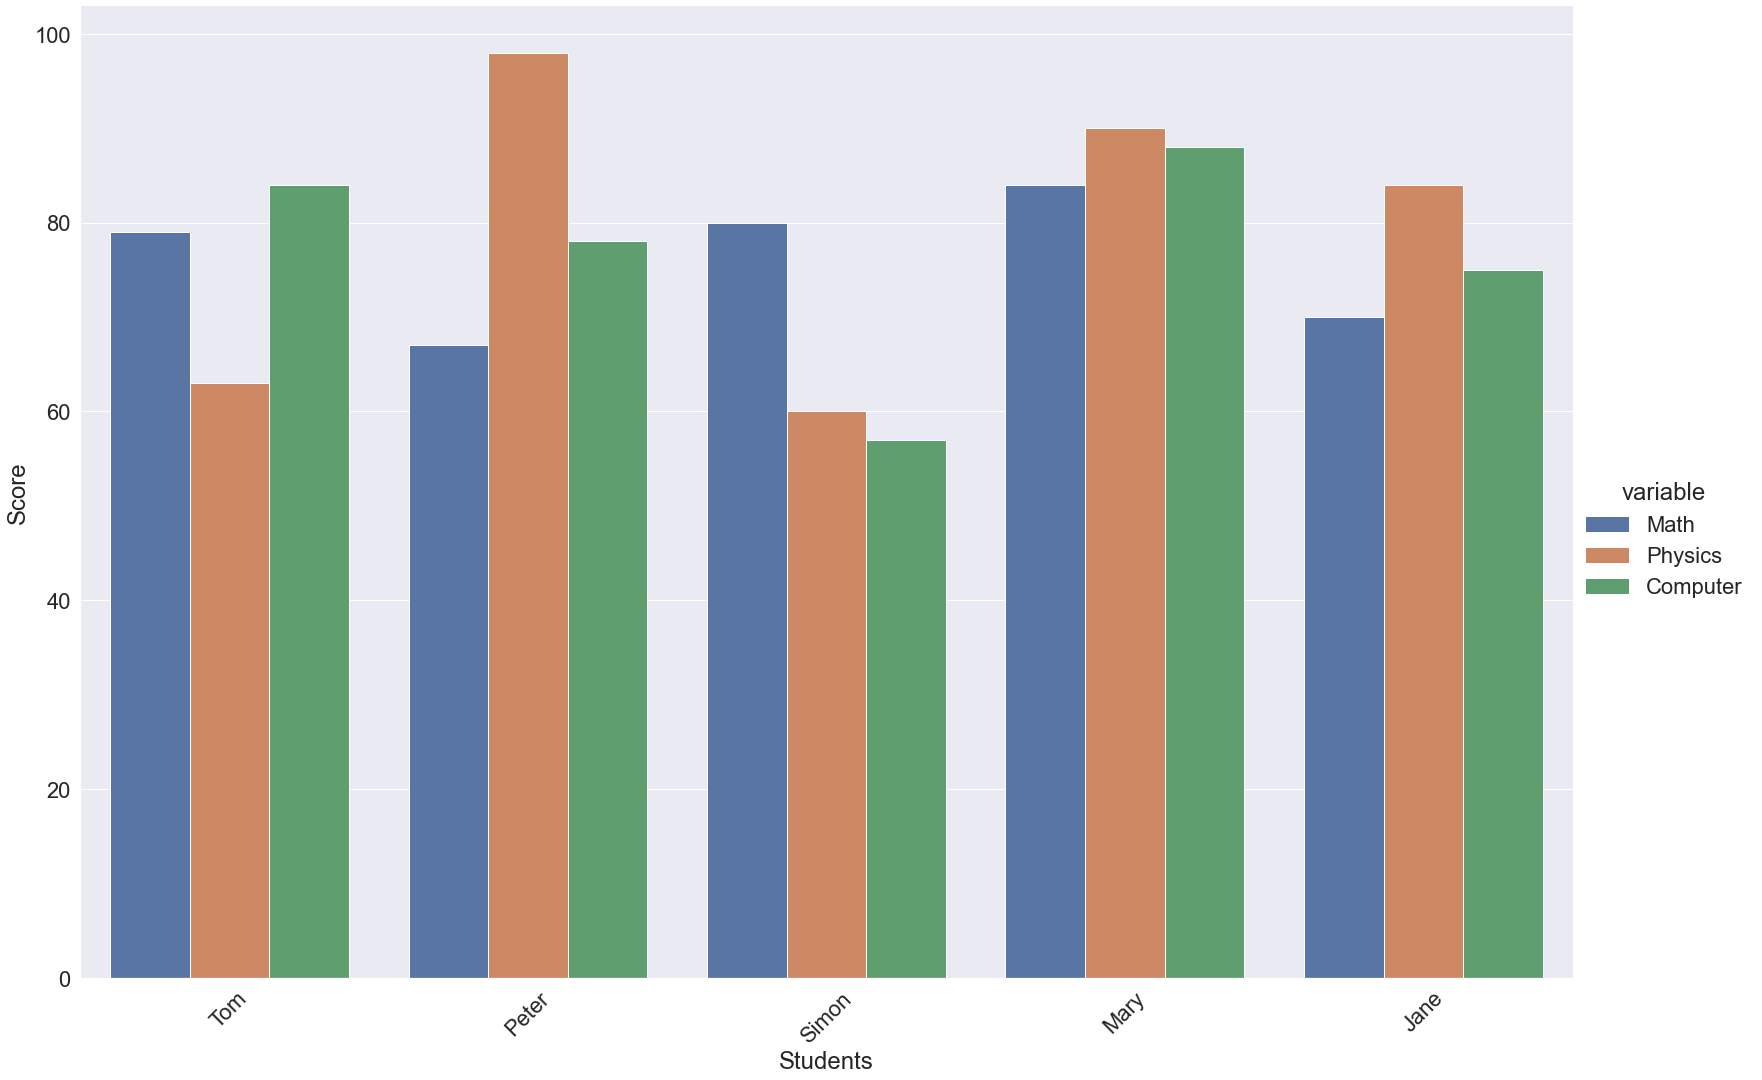

In [14]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.catplot(data=score_melt_df, kind="bar", x="Students", y="Score", hue="variable",height=15, aspect=1.5)
plt.xticks(rotation=45)
plt.show()

###### Stacked Bar Chart

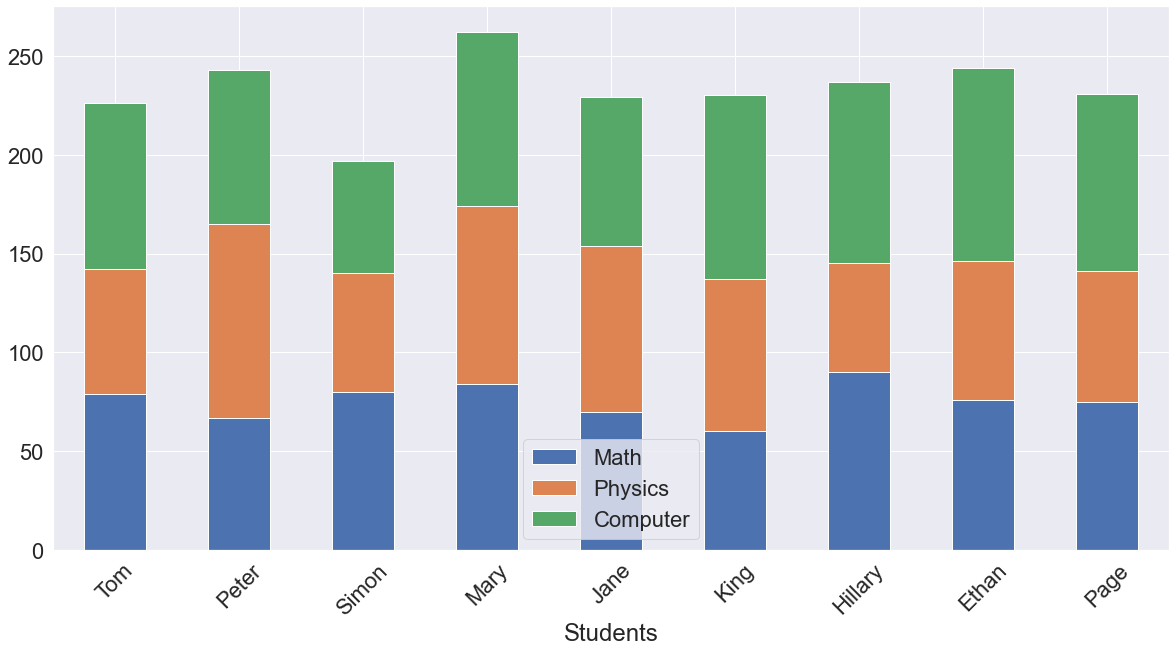

In [15]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
score_df[['Students','Math','Physics','Computer']].set_index('Students').plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.show()

## Scatter Plot

In [16]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###### Simple Scatter plot

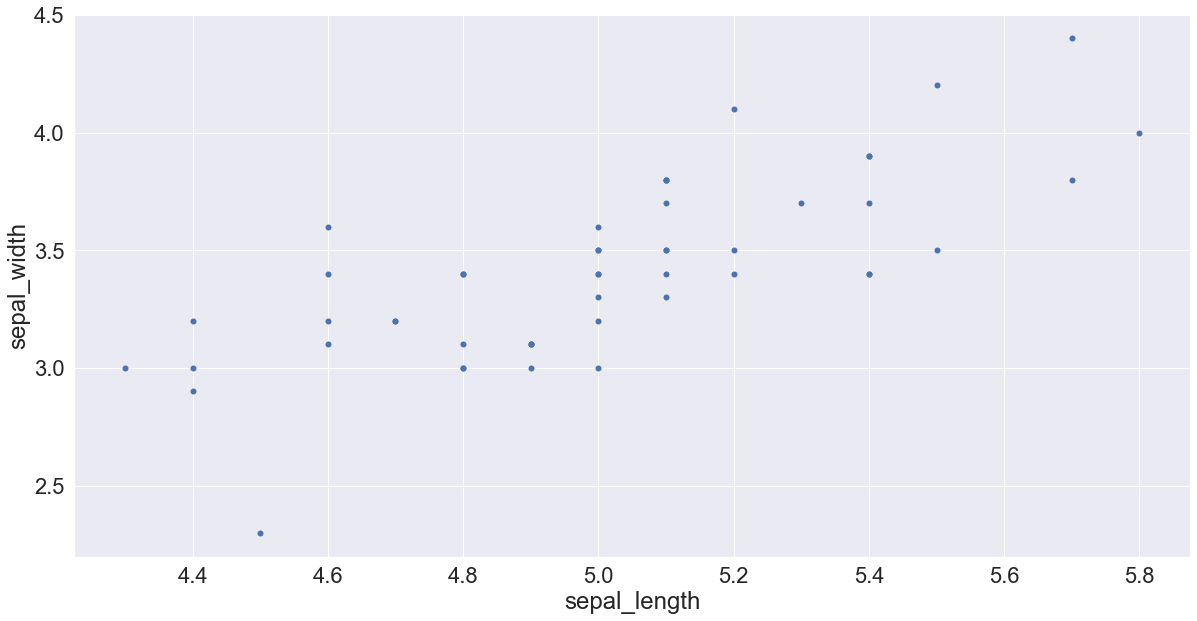

In [17]:
setosa_df=iris_df[iris_df['class']=='Iris-setosa']

plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="sepal_length", y="sepal_width", sizes=(1, 8), linewidth=0,data=setosa_df)
plt.show()

###### Multi-class Scatter plot

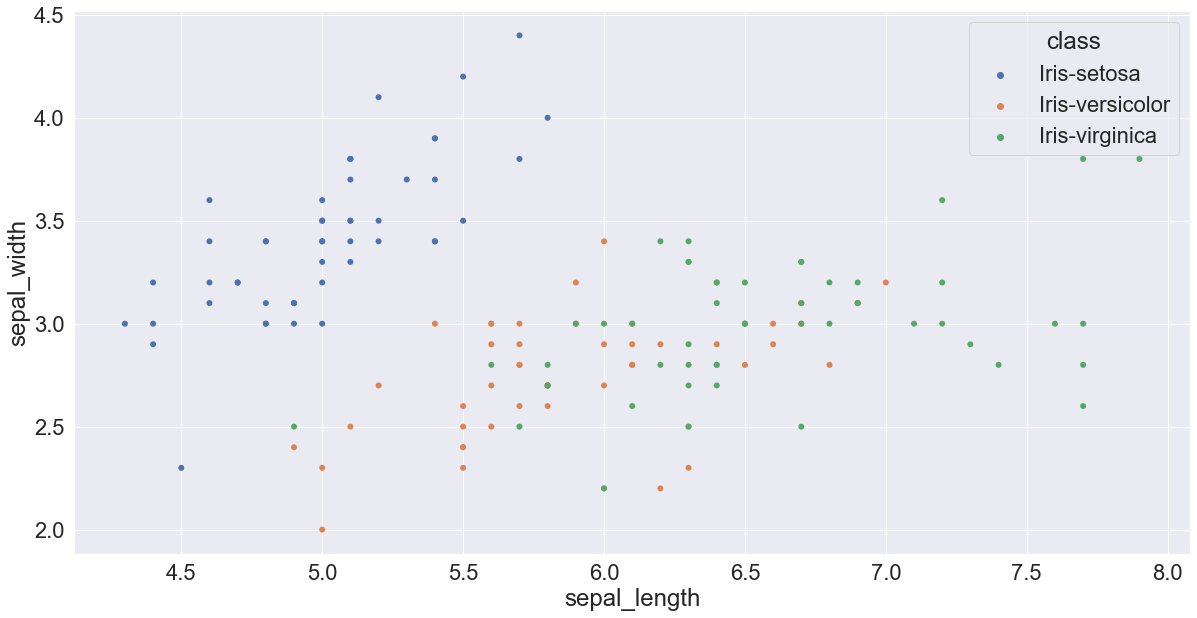

In [18]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="sepal_length", y="sepal_width", sizes=(1, 8), linewidth=0,data=iris_df,hue='class')
plt.show()

###### Buble chart

In [19]:
gdpPercap_df=pd.read_csv('gdpPercap.csv')
gdpPercap_2007_df=gdpPercap_df.query("year=='2007'")
gdpPercap_2007_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


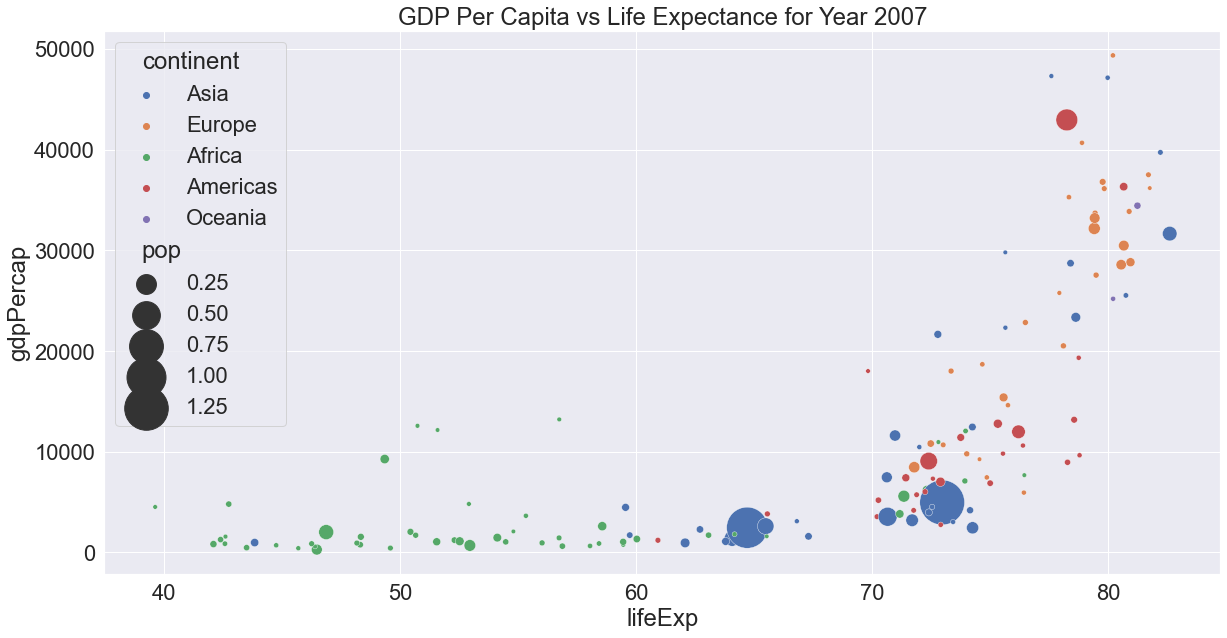

In [20]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(data=gdpPercap_2007_df, x="lifeExp", y="gdpPercap", size='pop', hue='continent',
                legend=True, sizes=(20, 2000))
plt.title('GDP Per Capita vs Life Expectance for Year 2007')
plt.show()

## Pie Chart

In [21]:
gdpPercap_df=pd.read_csv('gdpPercap.csv')
gdpPercap_2007_df=gdpPercap_df.query("year=='2007'")
gdpPercap_2007_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [22]:
gdpPercap_2007_df=pd.DataFrame(gdpPercap_2007_df.groupby('continent')['gdpPercap'].sum())
gdpPercap_2007_df

,gdpPercap
continent,
Africa,160629.695446
Americas,275075.790634
Asia,411609.886714
Europe,751634.449078
Oceania,59620.376550


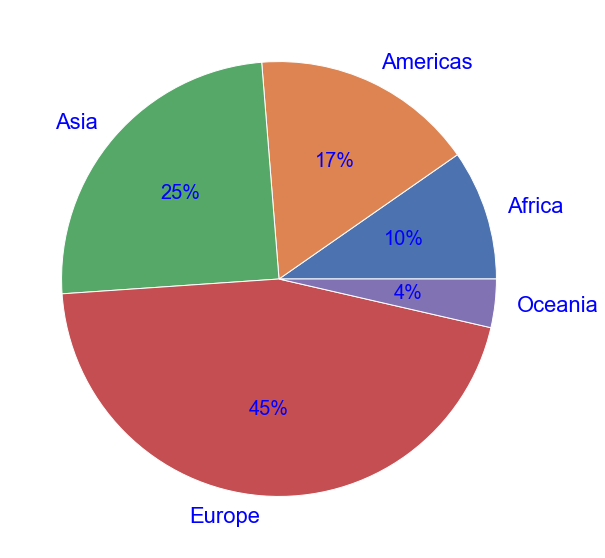

In [23]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
plt.pie(gdpPercap_2007_df['gdpPercap'], labels =gdpPercap_2007_df.index, autopct='%.0f%%')
plt.show()

###### Explode Pie

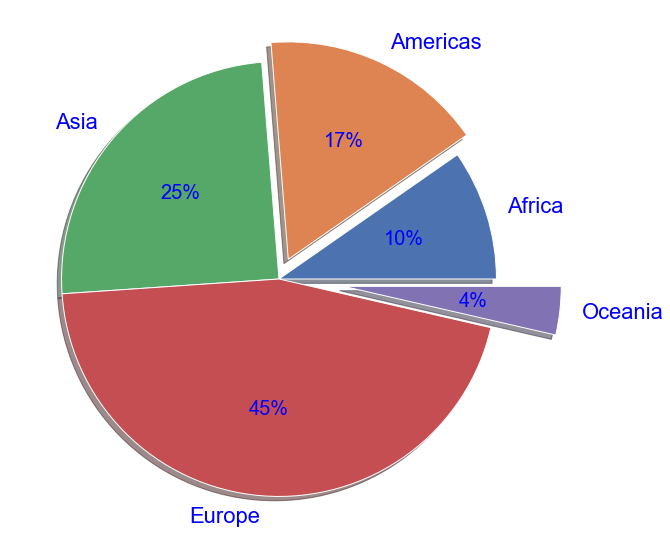

In [24]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
plt.pie(gdpPercap_2007_df['gdpPercap'], labels =gdpPercap_2007_df.index, autopct='%.0f%%', 
        explode=(0,0.1,0,0,0.3),shadow=True)
plt.show()

###### Donought

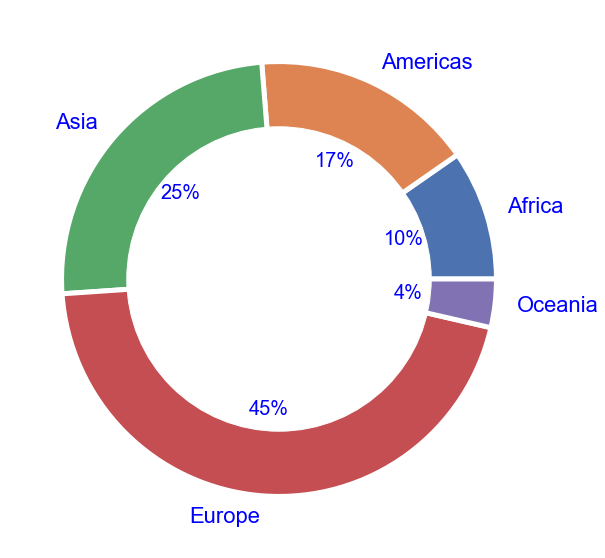

In [25]:
inner_circle = plt.Circle( (0,0), 0.7, color='white')

plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
plt.pie(gdpPercap_2007_df['gdpPercap'], labels =gdpPercap_2007_df.index, autopct='%.0f%%',
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(inner_circle)
plt.show()

## Box Plot

In [26]:
gdpPercap_df=pd.read_csv('gdpPercap.csv')
gdpPercap_2007_df=gdpPercap_df.query("year=='2007'")
gdpPercap_2007_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


###### Simple Boxplot

C:\Users\soongaya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


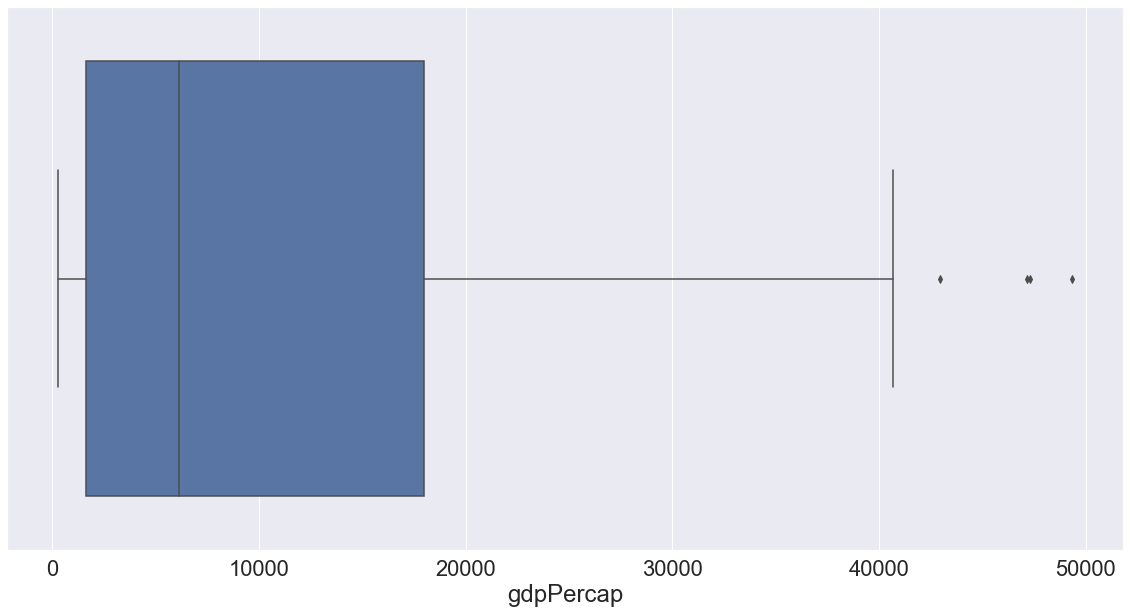

In [27]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.boxplot(gdpPercap_2007_df['gdpPercap'])
plt.show()

###### Multiple Boxplots

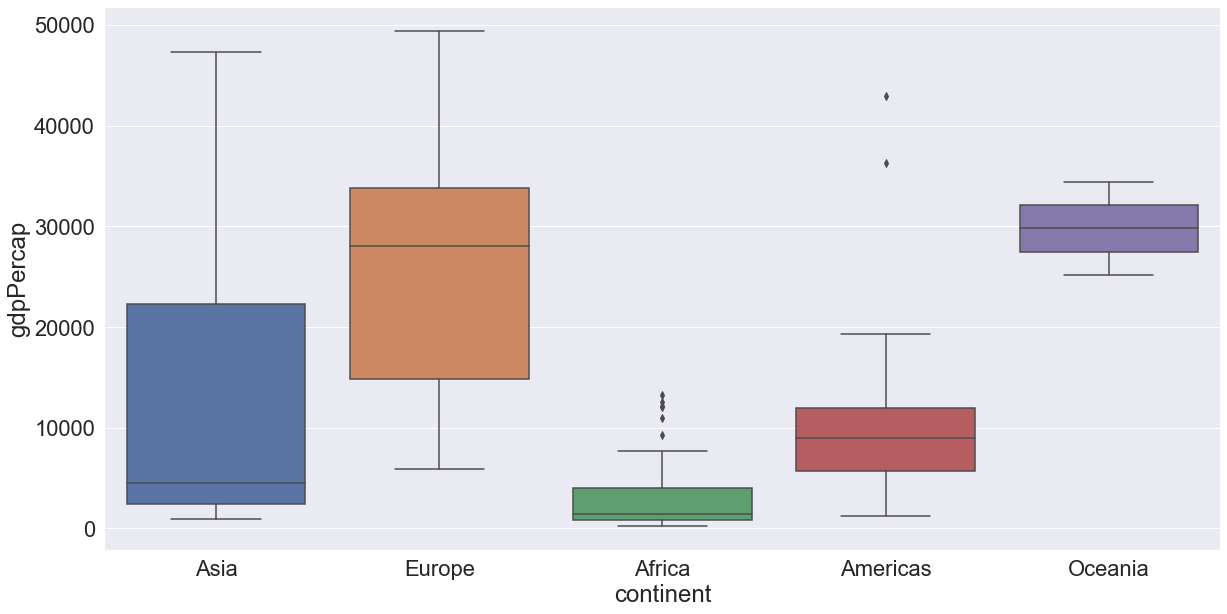

In [28]:
sns.boxplot(x='continent', y='gdpPercap', data=gdpPercap_2007_df)
plt.show()

## Heatmap

In [29]:
gdpPercap_df=pd.read_csv('gdpPercap.csv')
gdpPercap_heatmap_df=gdpPercap_df.pivot('year','country','gdpPercap')
gdpPercap_heatmap_df.iloc[0:,0:12]

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,Benin,Bolivia
year,,,,,,,,,,,,
1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,8343.105127,1062.752200,2677.326347
1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,9714.960623,959.601080,2127.686326
1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,10991.206760,949.499064,2180.972546
1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,13149.041190,1035.831411,2586.886053
1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,16672.143560,1085.796879,2980.331339
1977,786.113360,3533.003910,4910.416756,3008.647355,10079.026740,18334.19751,19749.422300,19340.101960,659.877232,19117.974480,1029.161251,3548.097832
1982,978.011439,3630.880722,5745.160213,2756.953672,8997.897412,19477.00928,21597.083620,19211.147310,676.981866,20979.845890,1277.897616,3156.510452
1987,852.395945,3738.932735,5681.358539,2430.208311,9139.671389,21888.88903,23687.826070,18524.024060,751.979403,22525.563080,1225.856010,2753.691490
1992,649.341395,2497.437901,5023.216647,2627.845685,9308.418710,23424.76683,27042.018680,19035.579170,837.810164,25575.570690,1191.207681,2961.699694


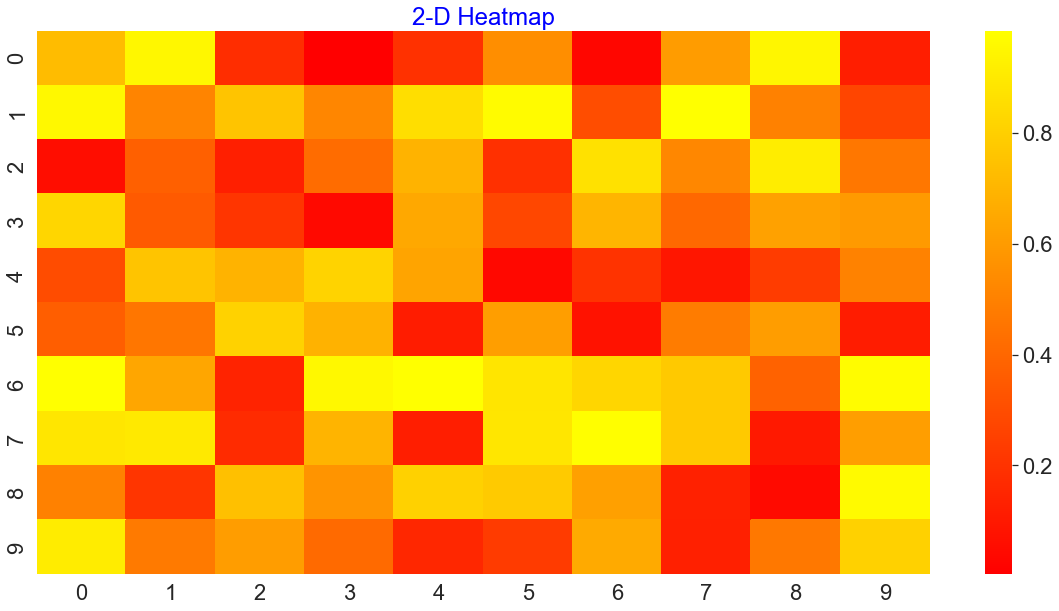

In [30]:
heatmap_data = np.random.random(( 10 , 10 ))

plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
sns.heatmap(heatmap_data,cmap='autumn')
plt.title('2-D Heatmap')
plt.show()

###### Heatmap with DataFrame 

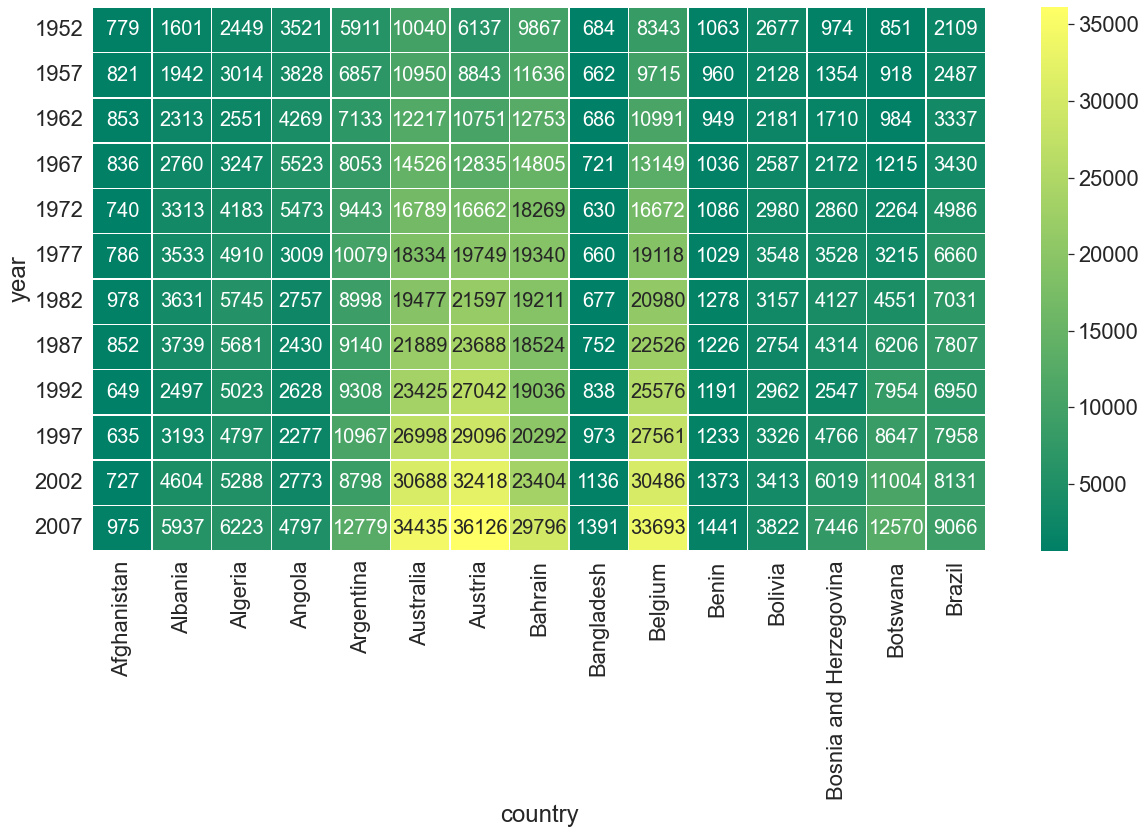

In [31]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
sns.heatmap(gdpPercap_heatmap_df.iloc[0:,0:15], annot=True, fmt=".0f", linewidths=.5,cmap='summer')
plt.show()

###### Correlation Heatmap

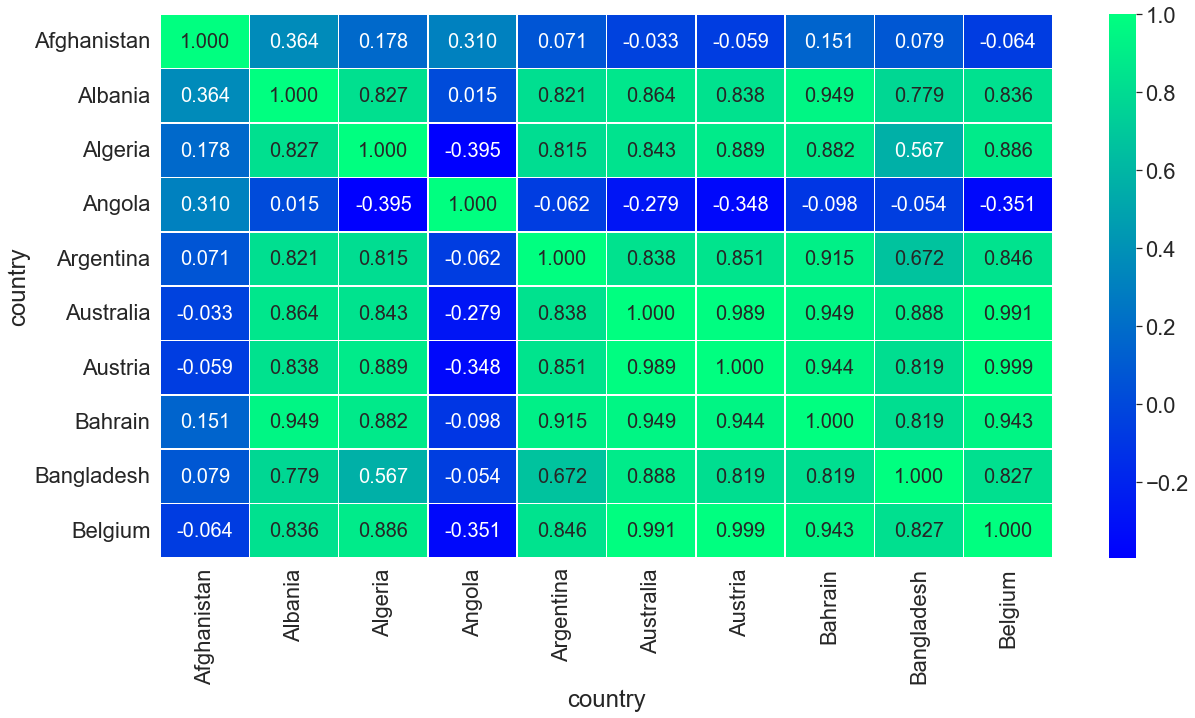

In [32]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(gdpPercap_heatmap_df.corr().iloc[0:10,0:10], annot=True, fmt=".3f", linewidths=.5,cmap='winter')
plt.show()

## Grouped Visualizations

###### Pairplot

In [33]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


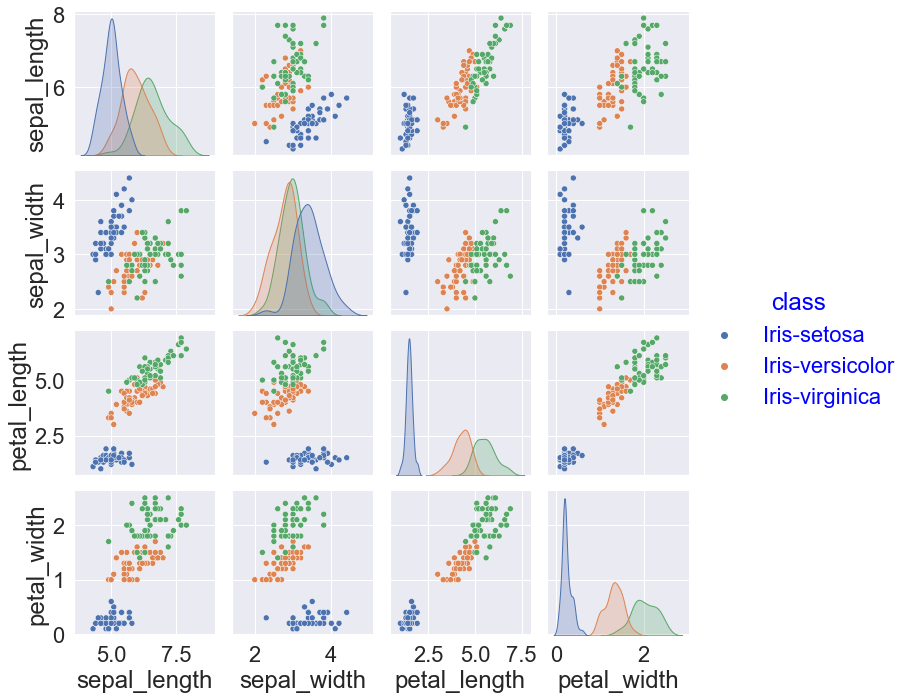

In [34]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.pairplot(iris_df,hue='class')
plt.show()

###### Joint plot

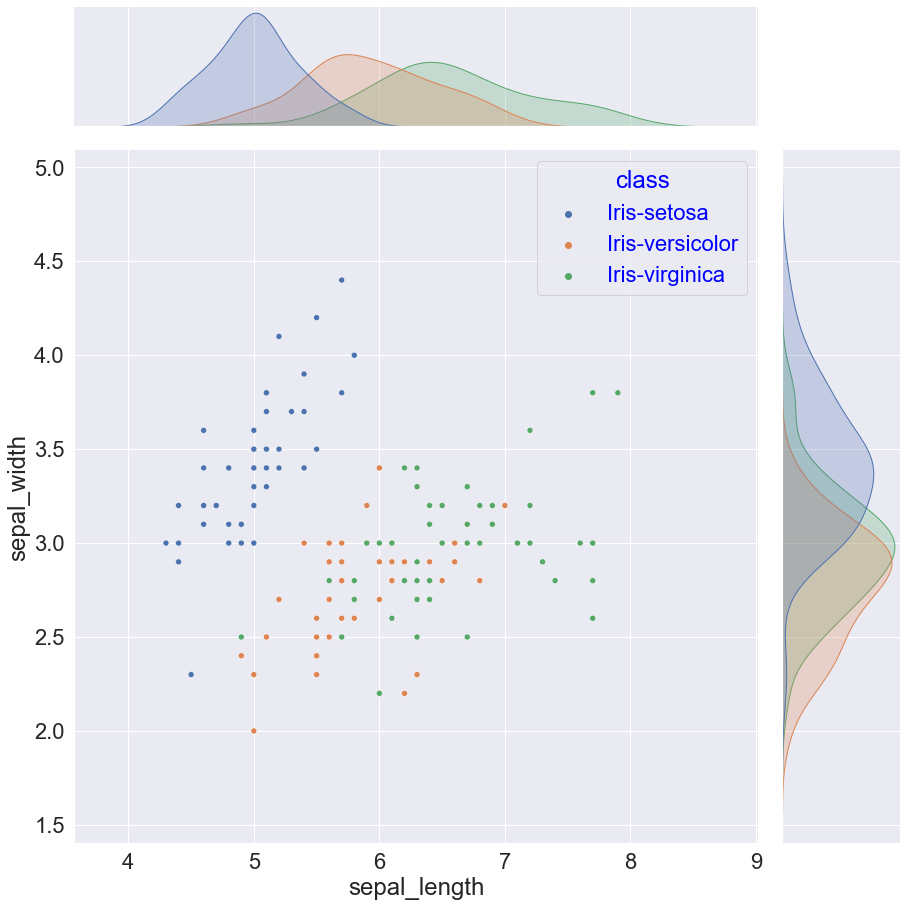

In [49]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.jointplot(data=iris_df,x='sepal_length',y='sepal_width',hue='class',height=13)
plt.show()

###### Distplot

[]

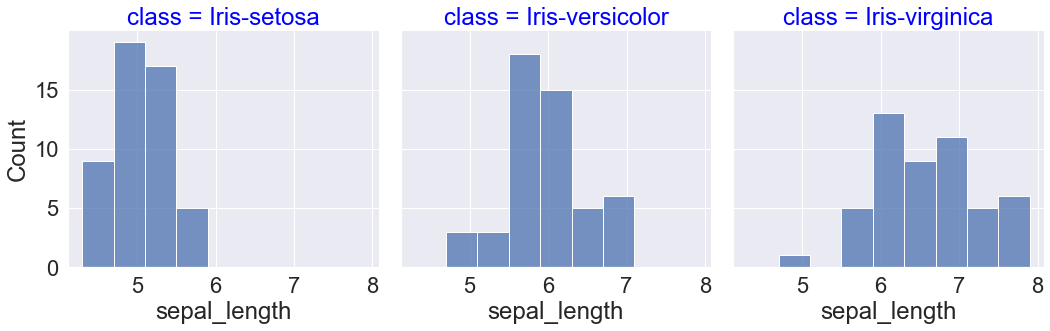

In [60]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.displot(iris_df, x="sepal_length", col="class", height=5, facet_kws=dict(margin_titles=True))
plt.plot()

## Distribtuion Plot

In [35]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Histogram

###### Plotting univariate histogram

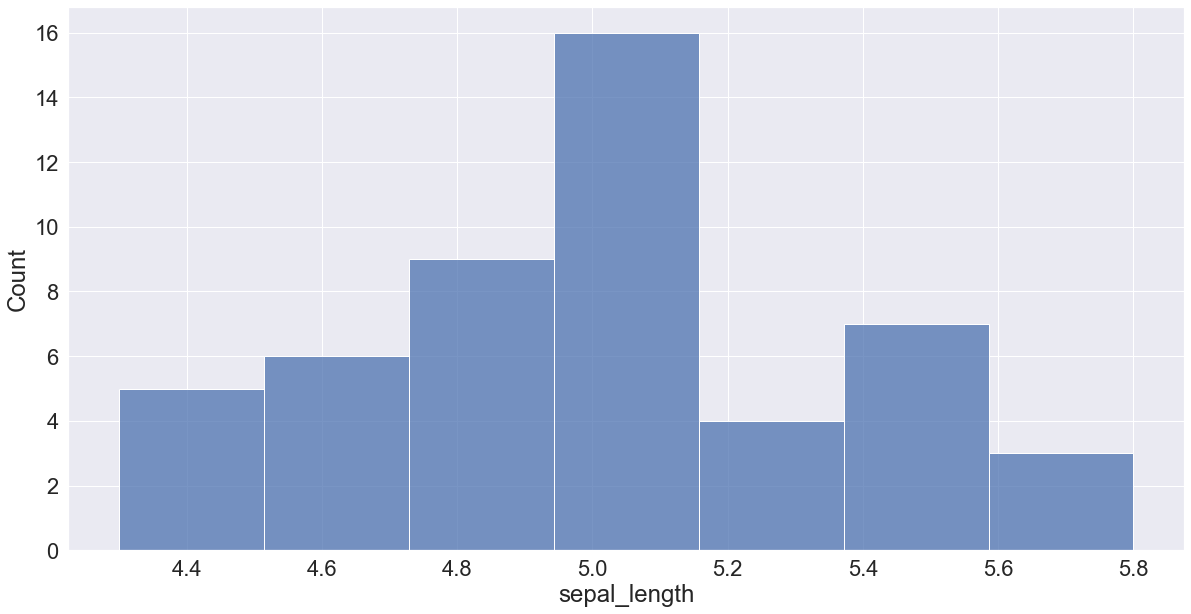

In [36]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.histplot(iris_df[iris_df['class']=='Iris-setosa'], x='sepal_length')
plt.show()

###### Adding kernel density estimate (kde) to histogram

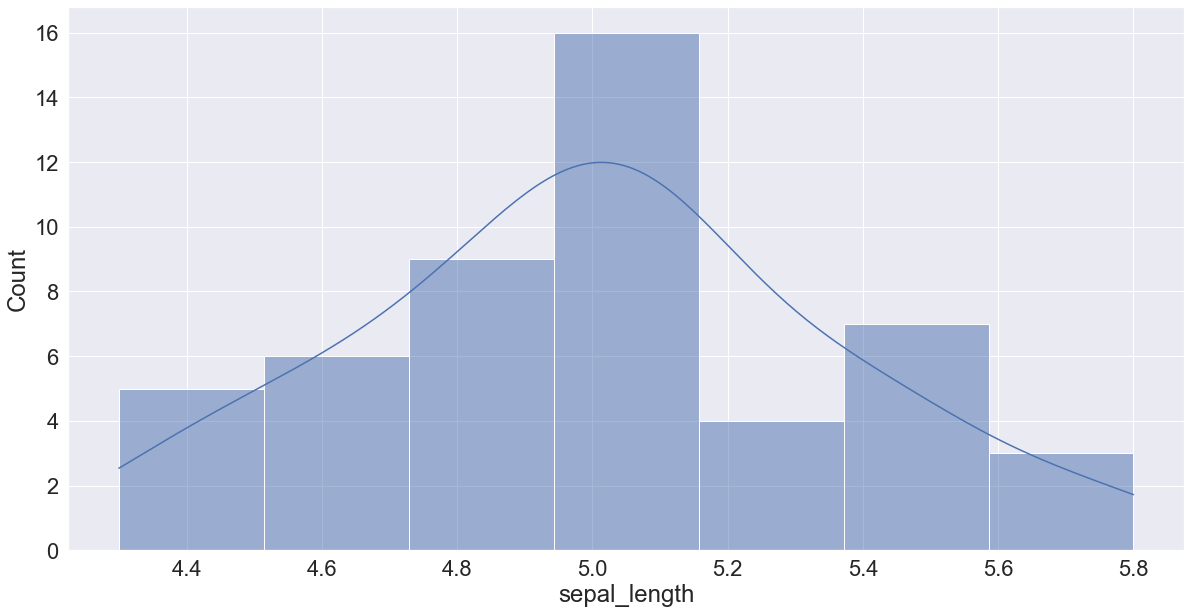

In [37]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.histplot(iris_df[iris_df['class']=='Iris-setosa'], x='sepal_length',kde=True)
plt.show()

###### Plotting multivariate histogram

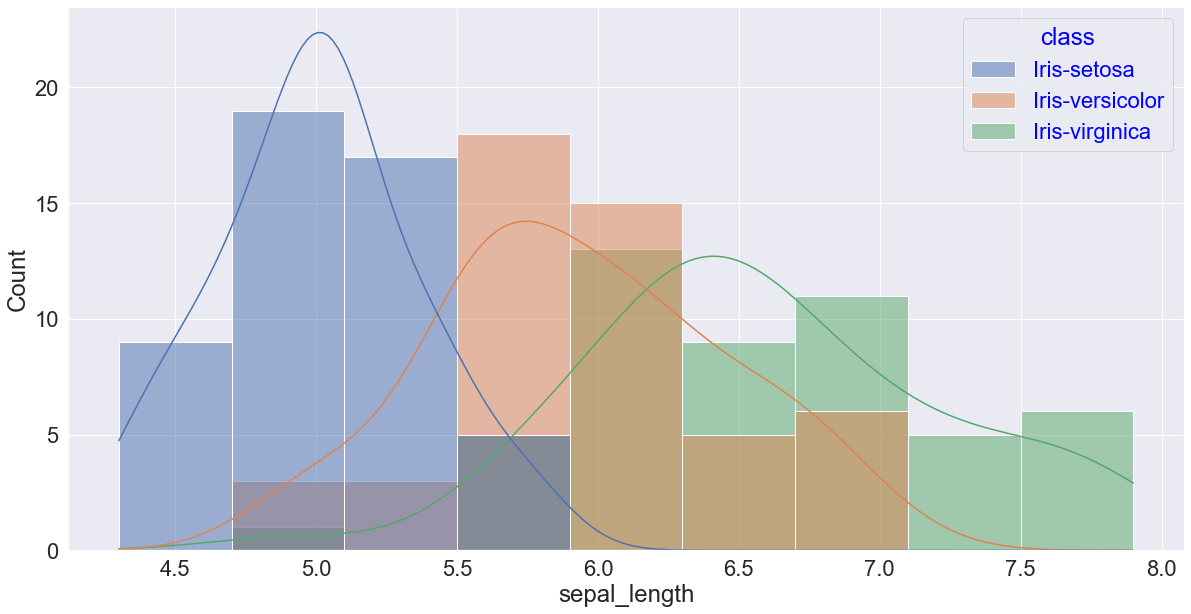

In [38]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.histplot(iris_df, x='sepal_length',kde=True, hue='class')
plt.show()

###  kernel density estimate (KDE) plot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

###### Simple univariate kde distribution

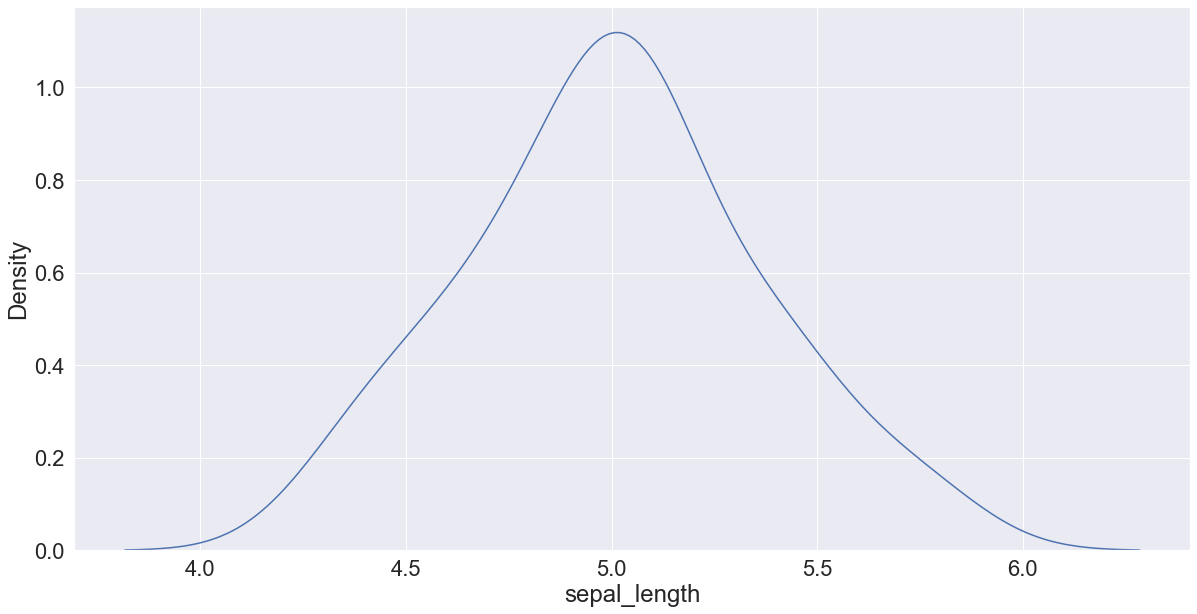

In [39]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.kdeplot(data=iris_df[iris_df['class']=='Iris-setosa'], x='sepal_length')
plt.show()

######  kde plot for all variables

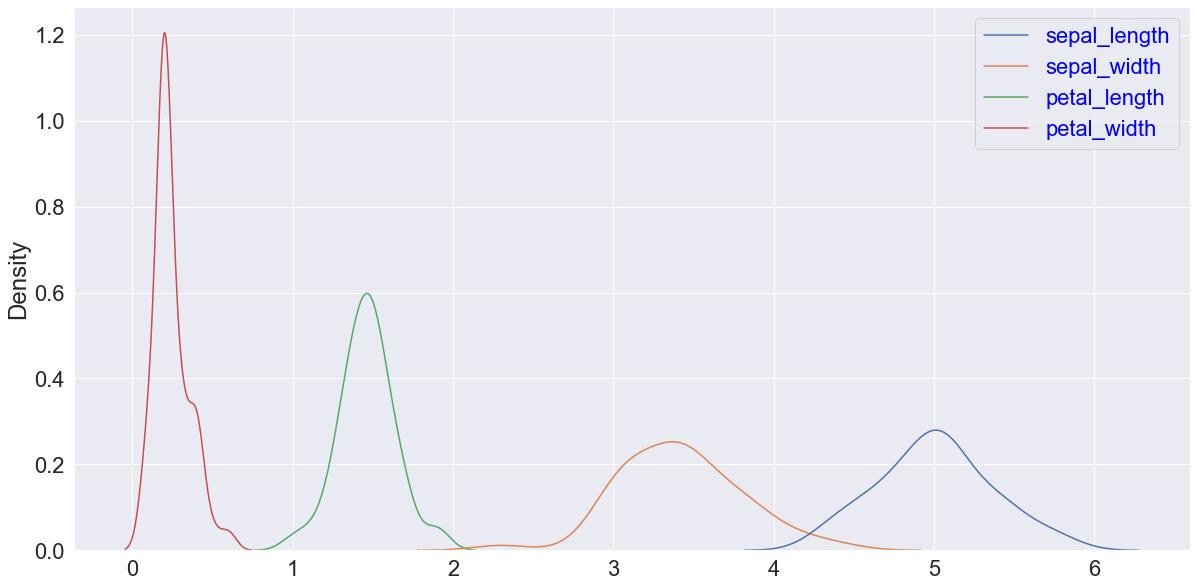

In [40]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.kdeplot(data=iris_df[iris_df['class']=='Iris-setosa'])
plt.show()

######  kde plot for different species

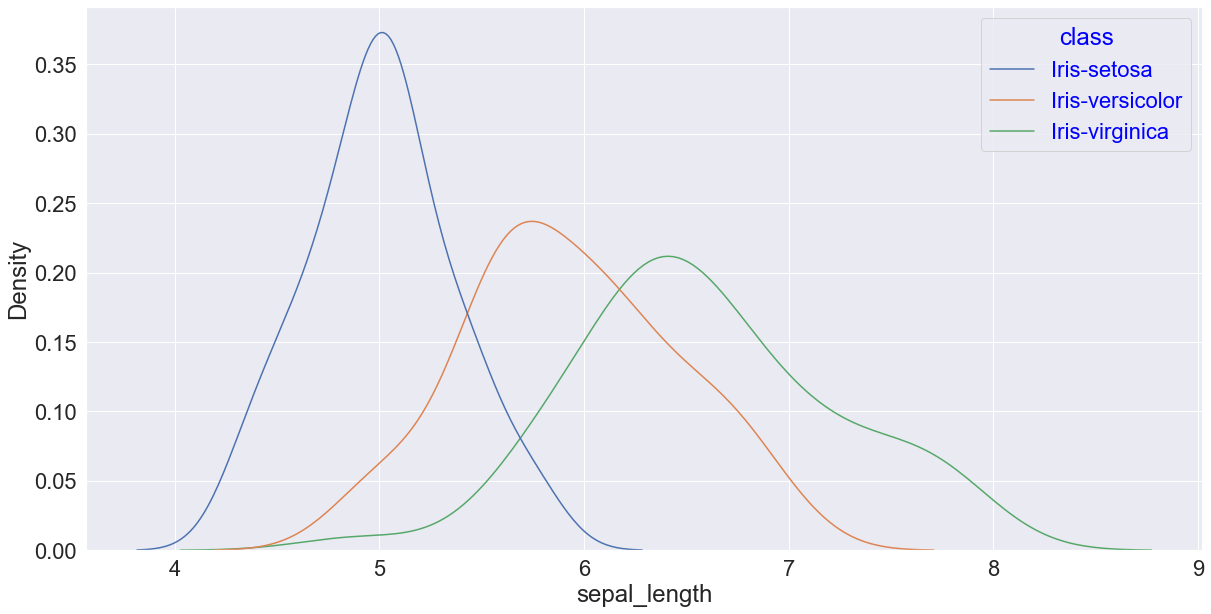

In [41]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.kdeplot(data=iris_df, x='sepal_length',hue='class')
plt.show()

######  kde plot with color fill

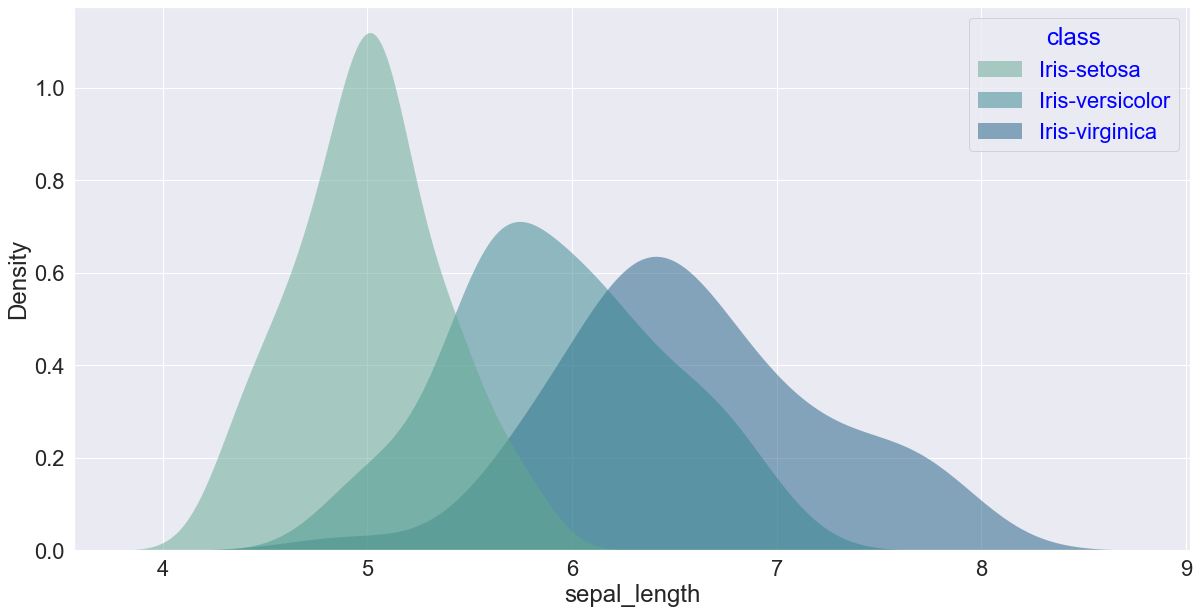

In [42]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20

sns.kdeplot(data=iris_df, x="sepal_length", hue="class",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.show()